In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve
import plotly.graph_objects as go

In [35]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Decision Tree\\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [37]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [38]:
print(f"Unique Values from 3 Columns:\
{pd.concat([df['ShelveLoc'],df['Urban'],df['US']]).unique()}")

Unique Values from 3 Columns:['Bad' 'Good' 'Medium' 'Yes' 'No']


In [39]:
df['ShelveLoc'] = df ['ShelveLoc'].map({'Bad':3,'Medium':2,'Good':1,})

In [40]:
df['Urban'] = df['Urban'].map({'No':0,'Yes':1})

In [41]:
df['US'] = df['US'].map({'No':0,'Yes':1})

In [42]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [43]:
df.sort_values(by='Sales')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0.00,139,24,0,358,185,2,79,15,0,0
106,0.16,102,33,0,217,139,2,70,18,0,0
165,0.37,147,58,7,100,191,3,27,15,1,1
143,0.53,122,88,7,36,159,3,28,17,1,1
57,0.91,93,91,0,22,117,3,75,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18,13.91,110,110,0,408,68,1,46,17,0,1
367,14.37,95,106,0,256,53,1,52,17,1,0
25,14.90,139,32,0,176,82,1,54,11,0,0
316,15.63,122,36,5,369,72,1,35,10,1,1


In [44]:
q0 = 0-0.005
q2 = df['Sales'].quantile(0.5)
q4 = df['Sales'].quantile(1)

In [45]:
df['Sales_Cat'] = pd.cut(df.Sales,bins = [q0,q2,q4],labels = ['Low Sales','High Sales'])

In [46]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,High Sales
1,11.22,111,48,16,260,83,1,65,10,1,1,High Sales
2,10.06,113,35,10,269,80,2,59,12,1,1,High Sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Low Sales
4,4.15,141,64,3,340,128,3,38,13,1,0,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High Sales
396,6.14,139,23,3,37,120,2,55,11,0,1,Low Sales
397,7.41,162,26,12,368,159,2,40,18,1,1,Low Sales
398,5.94,100,79,7,284,95,3,50,12,1,1,Low Sales


In [47]:
df['Sales_Cat'].value_counts()

Low Sales     201
High Sales    199
Name: Sales_Cat, dtype: int64

In [48]:
df['Sales_Cat'] = df['Sales_Cat'].map({'High Sales':1,'Low Sales':2})

In [49]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,3,38,13,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,3,50,12,1,1,2


# Scalling the Data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns = df.columns,
                  index = df.index)

In [51]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0,0.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0,0.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0,0.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0,0.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0,1.0


In [64]:
df1 = df1.drop(["Sales"],axis=1)

In [65]:
x = df1.drop(['Sales_Cat'],axis =1)
y = df1.iloc[:,-1]

In [66]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [67]:
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    0.0
Name: Sales_Cat, Length: 400, dtype: float64

In [68]:
df1['Sales_Cat'].unique()

array([0., 1.])

In [69]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Cat'],
      dtype='object')

In [70]:
colnames = list(df1.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales_Cat']

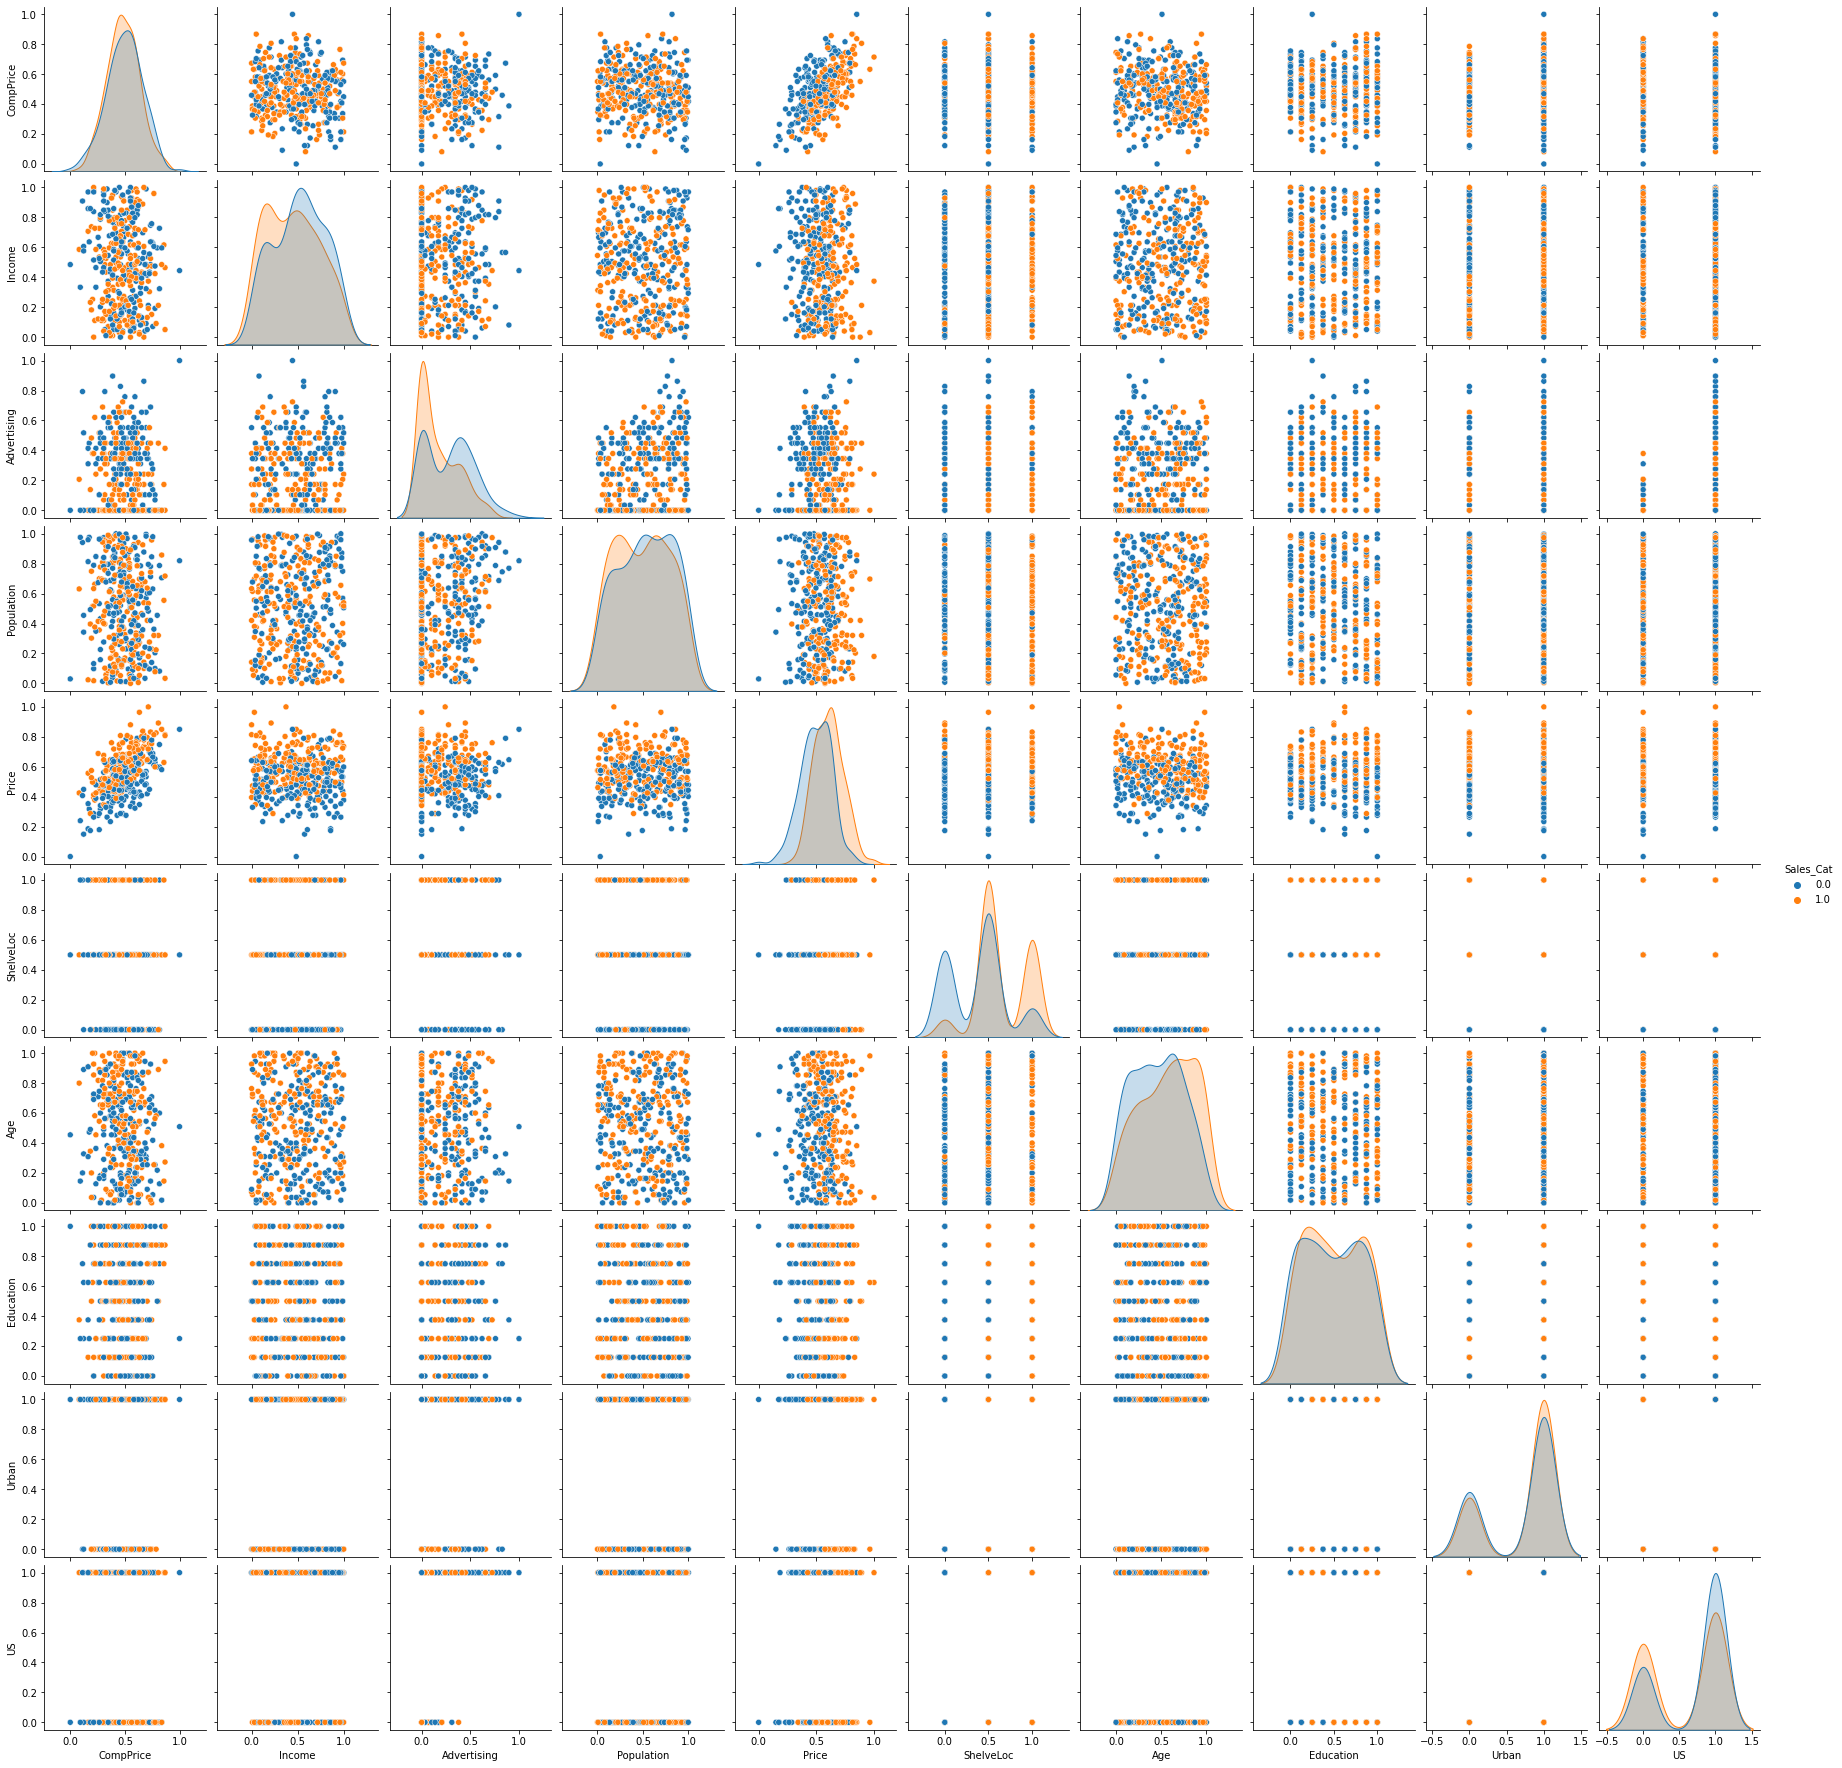

In [71]:
import seaborn as sns
sns.pairplot(df1,hue='Sales_Cat')

# Spliting the data into training and testing dataset

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [75]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
157,0.448980,0.373737,0.275862,0.478958,0.395210,0.5,0.418182,0.375,0.0,1.0
109,0.387755,0.444444,0.000000,0.414830,0.395210,0.5,0.636364,0.875,0.0,0.0
17,0.714286,0.535354,0.448276,0.482966,0.640719,0.0,0.490909,0.000,1.0,1.0
347,0.193878,0.181818,0.000000,0.302605,0.526946,0.0,0.036364,0.500,0.0,0.0
24,0.693878,0.989899,0.551724,0.569138,0.532934,1.0,0.309091,0.250,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
71,0.724490,0.303030,0.551724,0.276553,0.754491,0.5,0.600000,0.875,0.0,1.0
106,0.255102,0.121212,0.000000,0.414830,0.688623,0.5,0.818182,1.000,0.0,0.0
270,0.428571,0.050505,0.000000,0.549098,0.389222,0.0,0.018182,0.000,1.0,0.0
348,0.561224,0.818182,0.689655,0.899800,0.497006,0.0,0.436364,0.125,1.0,1.0


In [76]:
y_train

157    0.0
109    0.0
17     0.0
347    1.0
24     0.0
      ... 
71     1.0
106    1.0
270    0.0
348    0.0
102    1.0
Name: Sales_Cat, Length: 280, dtype: float64

In [77]:
df1[df1['Sales_Cat'] == 0]['ShelveLoc']

0      1.0
1      0.0
2      0.5
5      1.0
7      0.0
      ... 
387    0.5
388    1.0
389    0.5
395    0.0
399    0.0
Name: ShelveLoc, Length: 199, dtype: float64

# Deciding the best parameter

In [78]:
criteria=["gini","entropy"]
for x in criteria:
    acc = []
    for i in range(2,20,1):
        model = DecisionTreeClassifier(criterion = x,max_depth=i,random_state=42)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='Max-depth',
                   yaxis_title='Accuracy')
    fig.show()

From the above graph we can say that entropy is giving good results and we can take maximum depth of 4 as there is less difference between the training and testing dataset and accuracy is also good.

# Building Decision Tree Classifier using Entropy Criteria

In [79]:
model = DecisionTreeClassifier(criterion='entropy', max_depth= 4)

In [80]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Plotting of Decision Tree

In [81]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Cat'],
      dtype='object')

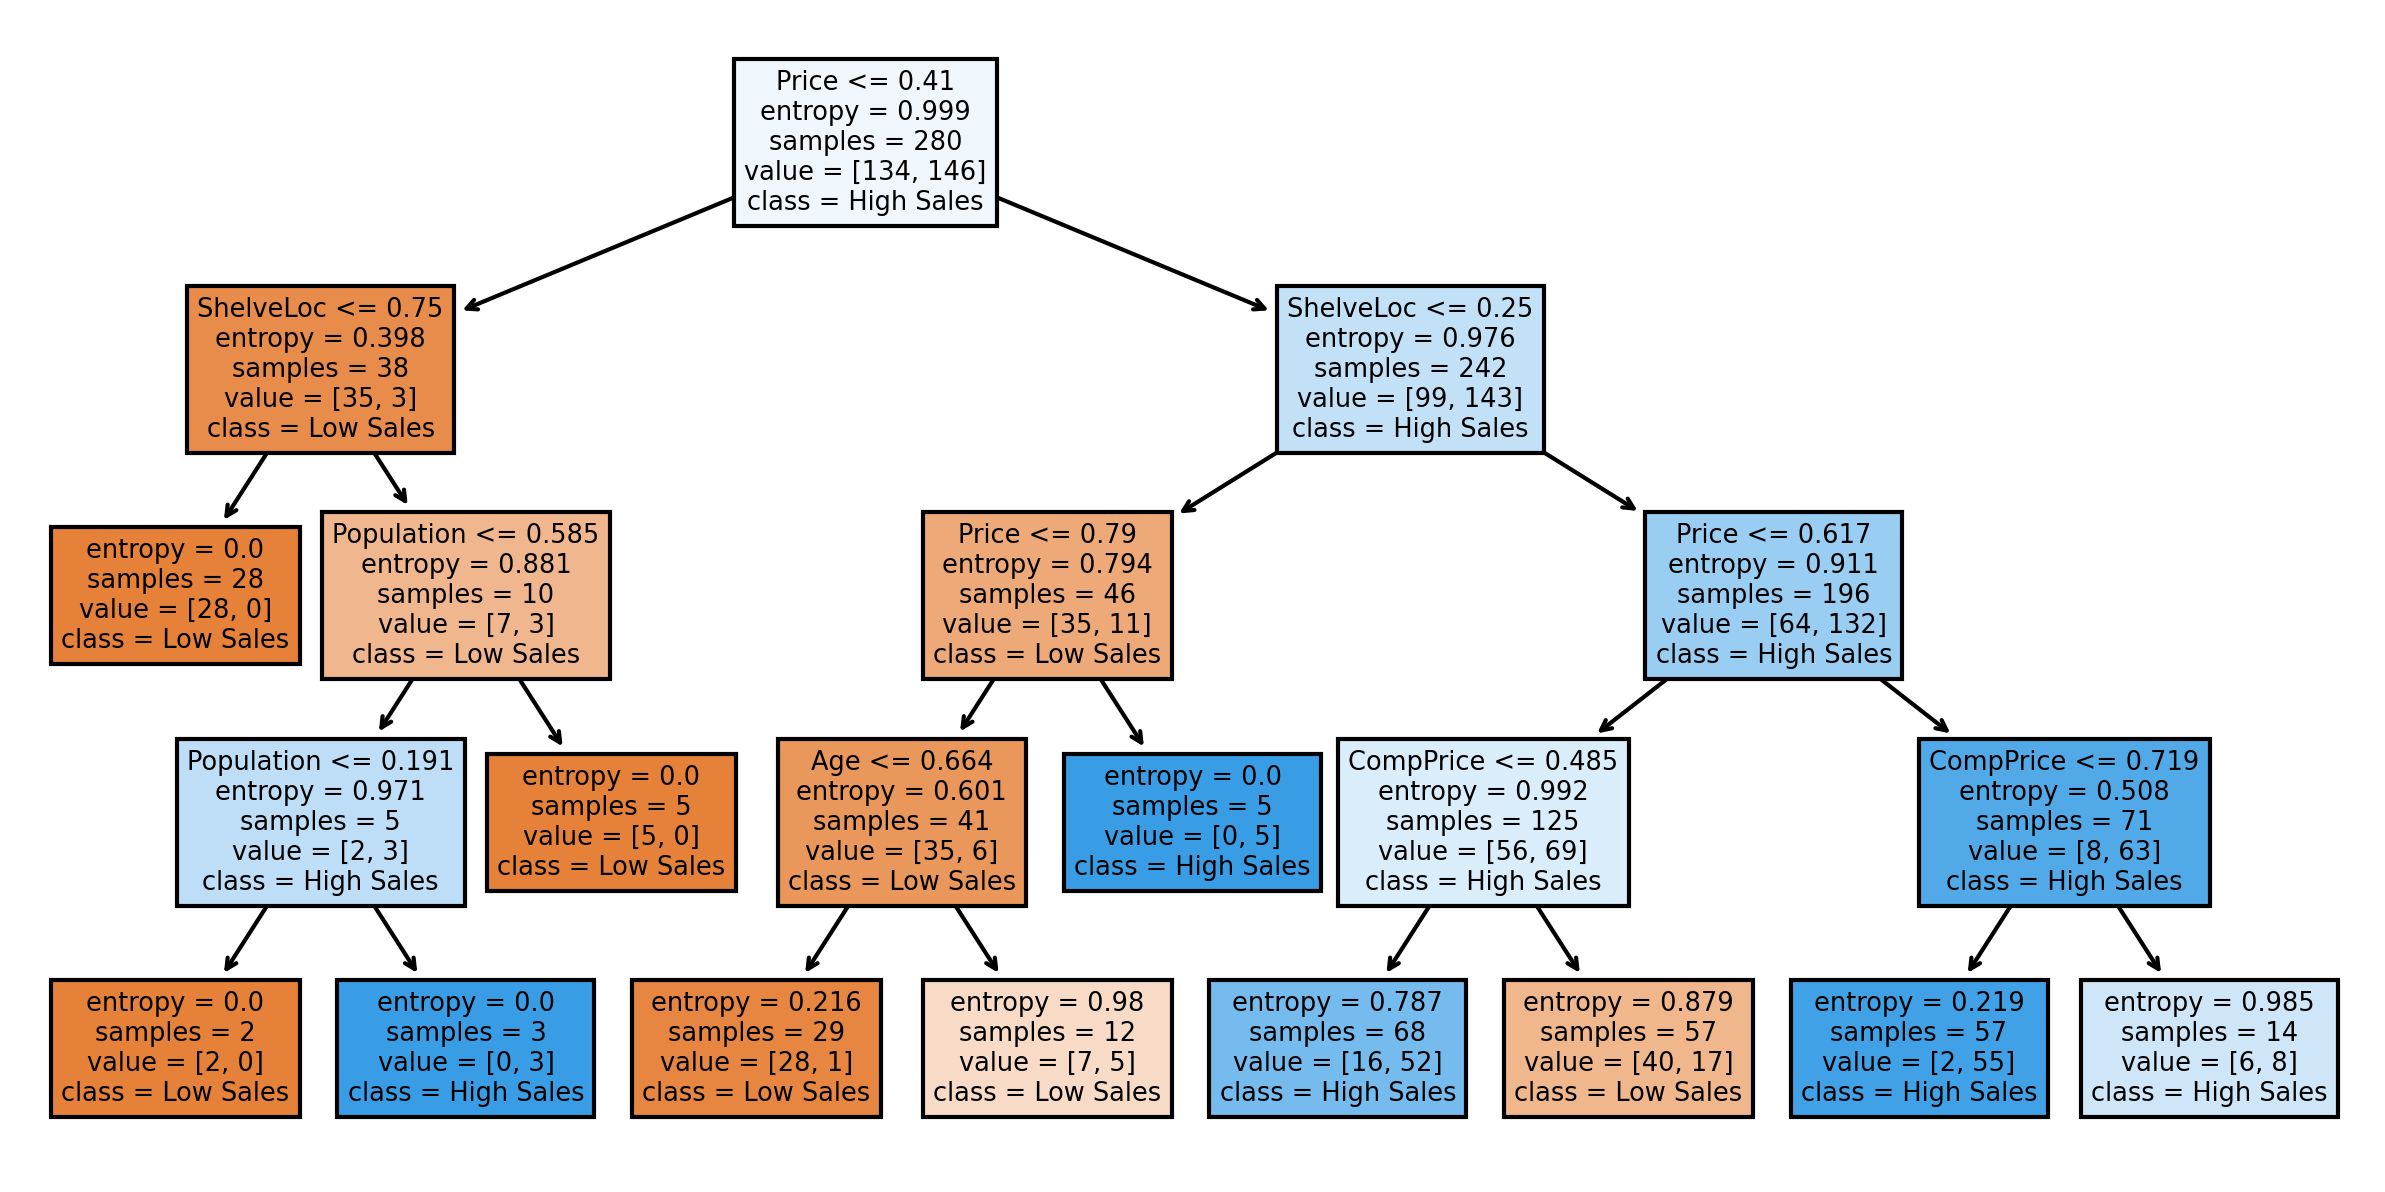

In [82]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US',] #feature names
cn = ['Low Sales','High Sales'] #class names

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5), dpi = 300)

plot_tree(model,
         feature_names=fn,
         class_names=cn,
         filled = True)
plt.show()

# Predicting on test data

In [83]:
preds = model.predict(x_test)
preds

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0.])

In [84]:
pd.Series(preds).value_counts()

0.0    63
1.0    57
dtype: int64

In [85]:
y_test

209    1.0
280    1.0
33     0.0
210    1.0
93     0.0
      ... 
60     0.0
79     0.0
285    0.0
305    0.0
281    0.0
Name: Sales_Cat, Length: 120, dtype: float64

In [86]:
pd.DataFrame({'Actual':y_test,
             'Predicted':preds})

,Actual,Predicted
209,1.0,0.0
280,1.0,1.0
33,0.0,0.0
210,1.0,0.0
93,0.0,0.0
...,...,...
60,0.0,1.0
79,0.0,1.0
285,0.0,1.0
305,0.0,1.0


In [87]:
pd.crosstab(y_test, preds)

col_0,0.0,1.0
Sales_Cat,,
0.0,48,17
1.0,15,40


In [88]:
preds == y_test

209    False
280     True
33      True
210    False
93      True
       ...  
60     False
79     False
285    False
305    False
281     True
Name: Sales_Cat, Length: 120, dtype: bool

In [89]:
np.mean(preds == y_test)

0.7333333333333333

# Classification Report

In [90]:
print(classification_report(y_test, preds, target_names=cn))

              precision    recall  f1-score   support

   Low Sales       0.76      0.74      0.75        65
  High Sales       0.70      0.73      0.71        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



# Confusion Matrix

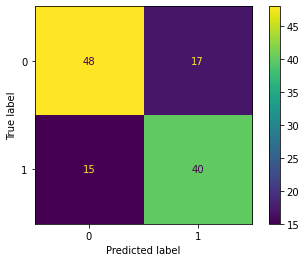

In [96]:
confusionmatrix = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix)
cm_display.plot()
plt.show() 



 ROC AUC score: 0.732867132867133 




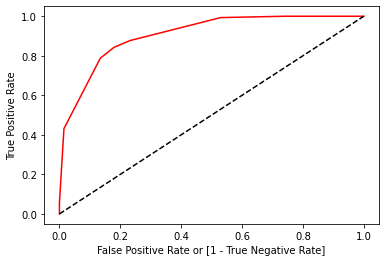

In [97]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_test, preds)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')
plt.show()